In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('EPL player stats - Sheet1.csv')
df.head()

,Player,Club,born,Height,Position,2021-2022
0,Brenden Aaronson,Leeds United,22/10/2000,178 cm,MF,2021-2022
1,Zach Abbott,Nottingham Forest,13/05/2006,173,DF,2021-2022
2,Terry Ablade,Fulham FC,12/10/2001,181 cm,FW,2021-2022
3,Adama Traoré,Wolverhampton Wanderers,25/01/1996,178 cm,FW,2021-2022
4,Ché Adams,Southampton FC,13/07/1996,179 cm,FW,2021-2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     1311 non-null   object
 1   Club       1311 non-null   object
 2   born       1311 non-null   object
 3   Height     1311 non-null   object
 4   Position   1311 non-null   object
 5   2021-2022  1311 non-null   object
dtypes: object(6)
memory usage: 61.6+ KB


In [4]:
df.dtypes

Player       object
Club         object
born         object
Height       object
Position     object
2021-2022    object
dtype: object

In [5]:
len(df)

1311

In [6]:
threshold = len(df)*0.05
threshold

65.55

In [7]:
#Checking for missing values
df.isna().sum()

Player       0
Club         0
born         0
Height       0
Position     0
2021-2022    0
dtype: int64

In [8]:
#Finding Duplicated value
df.duplicated().sum()

0

In [9]:
# description of the data in the DataFrame.
df.describe().T

,count,unique,top,freq
Player,1311,941,Isaac Price,2
Club,1311,23,Liverpool FC,77
born,1311,868,25/03/2000,5
Height,1311,45,183 cm,92
Position,1311,4,MF,453
2021-2022,1311,2,2022-2023,661


In [26]:
# Explanatory Data Analysis

In [10]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['Player', 'Club', 'born', 'Height', 'Position', '2021-2022'], dtype='object')

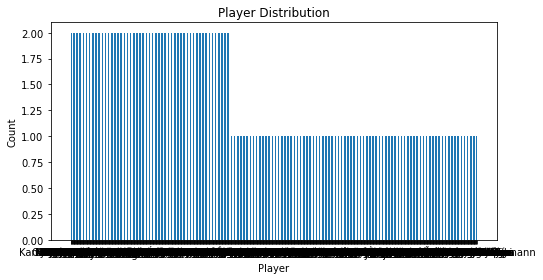

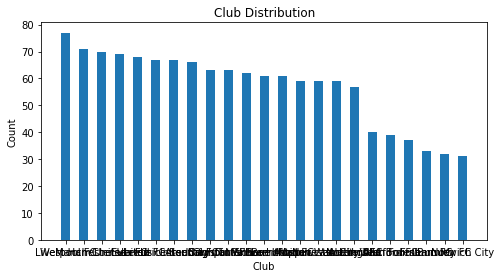

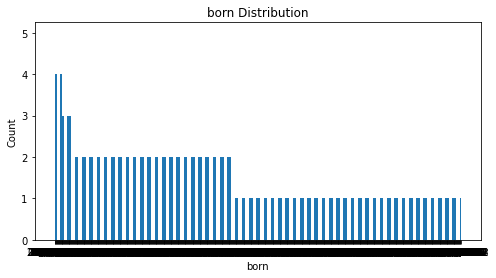

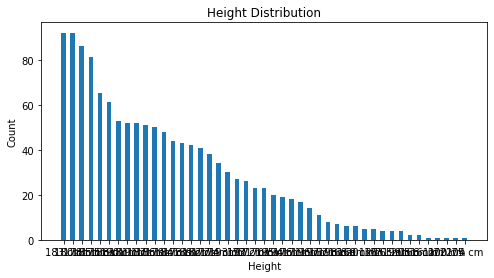

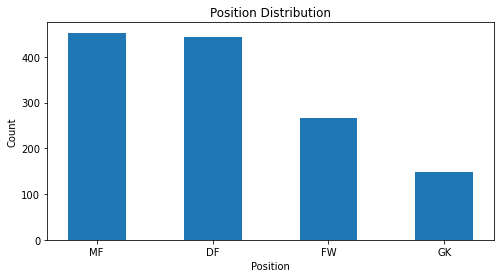

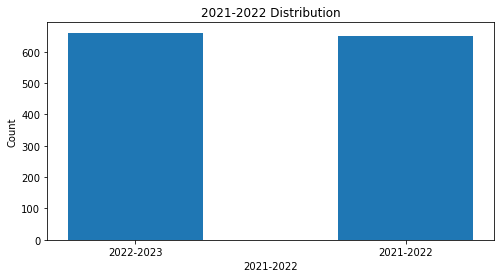

In [11]:
cat_col = df.select_dtypes(include='object').columns
for i, column in enumerate(cat_col):
    counts = df[column].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values,width=0.5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))

In [12]:
# convert the born string "22/10/2000" to a datetime object in Python
born_string = "22/10/2000"
Date_of_birth = datetime.strptime(born_string, '%d/%m/%Y')
print(Date_of_birth)

2000-10-22 00:00:00


In [13]:
# Convert the date column to a datetime object
date_objects = []
for date_string in df['born']:
    Date_of_birth = datetime.strptime(date_string, '%d/%m/%Y')
    date_objects.append(Date_of_birth)

df['Date_of_birth'] = date_objects

# Drop the original date column
df = df.drop('born', axis=1)

# Save the modified data to a new CSV file
df.to_csv("premier_league_data_with_dates.csv", index=False)

In [14]:
df.head()

,Player,Club,Height,Position,2021-2022,Date_of_birth
0,Brenden Aaronson,Leeds United,178 cm,MF,2021-2022,2000-10-22
1,Zach Abbott,Nottingham Forest,173,DF,2021-2022,2006-05-13
2,Terry Ablade,Fulham FC,181 cm,FW,2021-2022,2001-10-12
3,Adama Traoré,Wolverhampton Wanderers,178 cm,FW,2021-2022,1996-01-25
4,Ché Adams,Southampton FC,179 cm,FW,2021-2022,1996-07-13


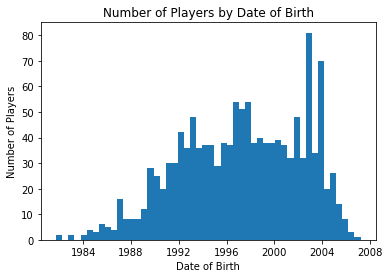

In [15]:
# plotting date of birth and number of players
plt.hist(df['Date_of_birth'], bins=50)
plt.xlabel('Date of Birth')
plt.ylabel('Number of Players')
plt.title('Number of Players by Date of Birth')
plt.show()

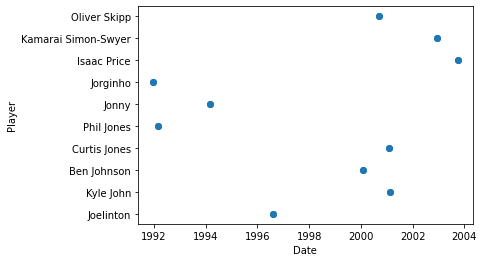

In [16]:
# Select only the top 10 players based on frequency
top_10_players = df['Player'].value_counts().nlargest(10).index.tolist()
df_top_10 = df.loc[df['Player'].isin(top_10_players)]

# Create a scatter plot of date_object vs player
plt.scatter(df_top_10['Date_of_birth'], df_top_10['Player'])
plt.xlabel('Date')
plt.ylabel('Player')
plt.show()

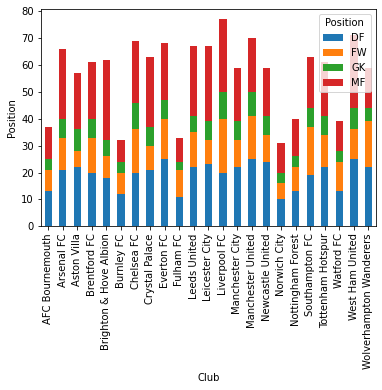

In [17]:
# Create a bar plot of club vs position
grouped_data = df.groupby(['Club', 'Position']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Club')
plt.ylabel('Position')
plt.show()

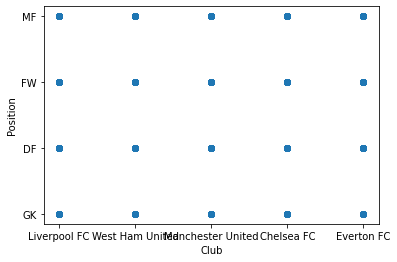

In [18]:
# Calculate the number of players for each club
club_counts = df['Club'].value_counts()

# Select the top 5 clubs
top_clubs = club_counts.index[:5]

# Filter the data to include only players from the top 10 clubs
filtered_df = df[df['Club'].isin(top_clubs)]

# Create a scatter plot of club vs position for the top 10 clubs
plt.scatter(filtered_df['Club'], filtered_df['Position'])
plt.xlabel('Club')
plt.ylabel('Position')
plt.show()

In [19]:
# Heights of top 10 players

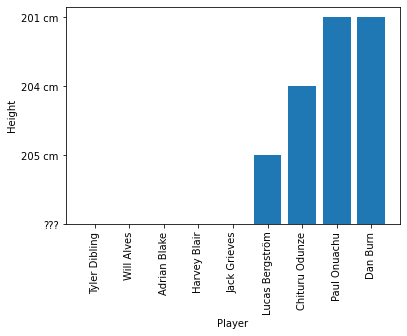

In [20]:
# Sort the data by height in descending order and select the top 10 rows
top_players = df.sort_values('Height', ascending=False).head(10)

# Create a bar plot of the player heights
plt.bar(top_players['Player'], top_players['Height'])
plt.xlabel('Player')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Convert the 'height' column to a numerical data type
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Find the index of the row with the maximum value in the 'height' column
tallest_idx = df['Height'].idxmax()

# Retrieve the player's name from the 'player' column using the loc[] method
tallest_player = df.loc[tallest_idx, 'Player']

print("The tallest player is", tallest_player)

The tallest player is Daniel Adu-Adjei


In [22]:
# Plotting heights of all the players

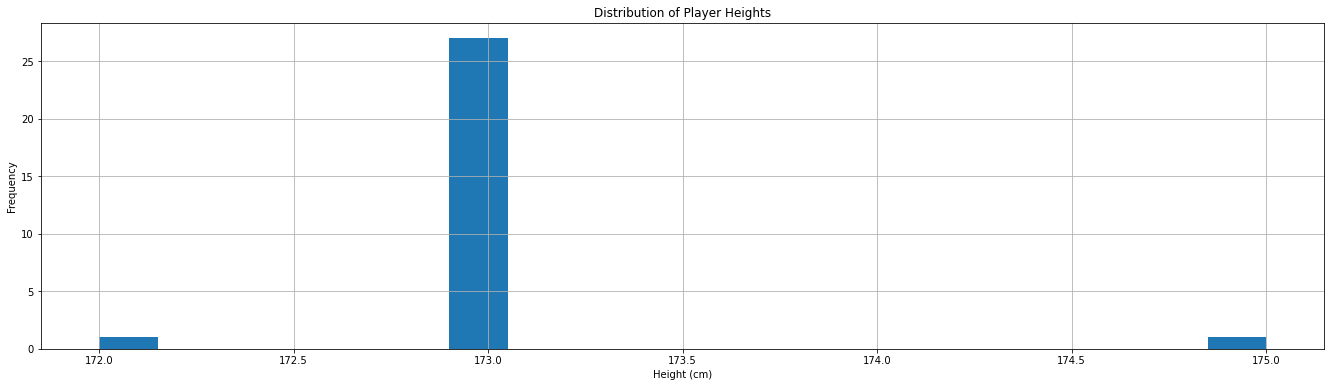

In [23]:
# Set the figure size in order to see the numbers. 
plt.figure(figsize=(23, 6))

# Create the histogram of player heights
df['Height'].hist(bins=20)

# Set the axis labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Heights')

# Show the plot
plt.show()

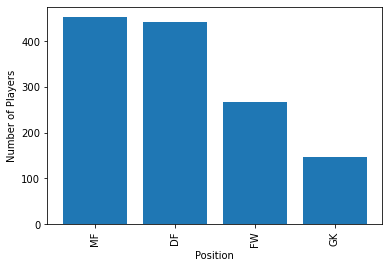

In [24]:
# Count the number of players in each position
position_counts = df['Position'].value_counts()

# Create a bar chart with positions on the x-axis and number of players on the y-axis
plt.bar(position_counts.index, position_counts.values)

# Set the x-axis label and rotate the tick labels
plt.xlabel('Position')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Number of Players')

# Show the plot
plt.show()

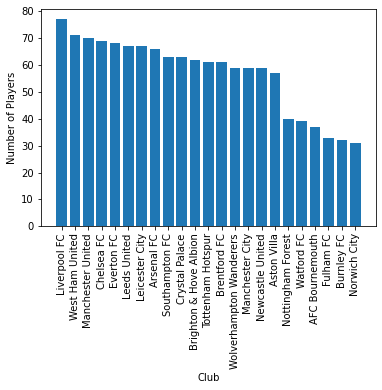

In [25]:
# Count the number of players in each club
club_counts = df['Club'].value_counts()

# Create a bar chart with clubs on the x-axis and number of players on the y-axis
plt.bar(club_counts.index, club_counts.values)

# Set the x-axis label and rotate the tick labels
plt.xlabel('Club')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Number of Players')

# Show the plot
plt.show()